## Edge Detection With Gaussian Filter
  
In the first step of modeling retina, we covered some basic computations in visual processing.
For the simplest model of edge detection algorithm in retina, we can use two gaussian filters.  

- one with narrower(low sigma) distribution
- one with wider distribution  

If we subtract two gaussian and apply convolution to the image, we can acquire results with clear contrast in the edge.

In [4]:
import numpy as np
from scipy.misc import imread
from scipy import ndimage
import math 
import matplotlib
from matplotlib import pyplot as plt

In [64]:
toGrey = lambda pixel : (0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2])/255

lena = imread('Ex01_lena.tiff')
grey = np.zeros((lena.shape[0], lena.shape[1]))

for rownum in range(len(lena)):
   for colnum in range(len(lena[rownum])):
      grey[rownum][colnum] = toGrey(lena[rownum][colnum])


In [135]:
def calculateCenter(dimension):
    return dimension[0]/2, dimension[1]/2

def gaussFilter2D(dimension, sigma):
    gauss = np.zeros(dimension)
    x, y = calculateCenter(dimension)
    
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            gauss[i][j] = (1.0/(2.0*3.14*sigma**2))*math.exp(-((x-i)**2 + (y-j)**2)/(2.0*sigma))
    return gauss

def weightMatrix(dimension, r_sigma):
    x, y = calculateCenter(dimension)
    
    matrix = np.zeros(dimension)
    # Should have optimized the code
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            r = math.sqrt((i - x)**2 + (j - y)**2)
            matrix[i][j] = math.exp(-(r-r_sigma)**2/(2.0*r_sigma**2))
    
    return matrix

In [126]:
dimension = (15, 15)

center_filter = gaussFilter2D(dimension, 5.0)
surround_filter = gaussFilter2D(dimension, 5.4)

DoG_filter = np.subtract(center_filter, surround_filter)

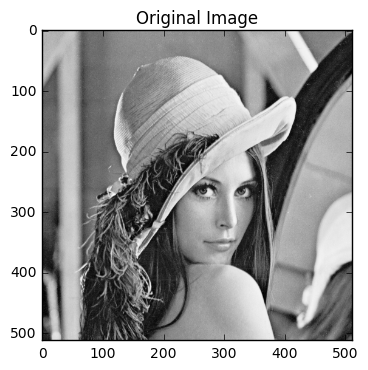

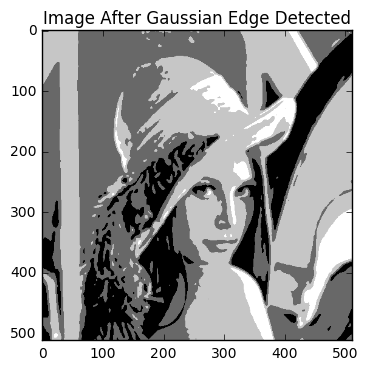

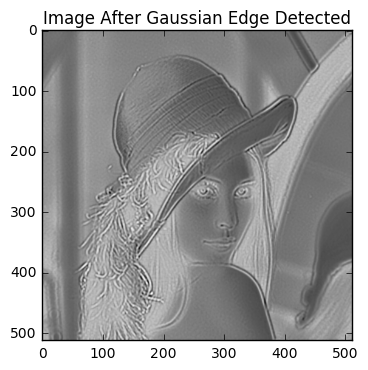

In [127]:
filtered = ndimage.filters.convolve(grey, DoG_filter)
for i in range(filtered.shape[0]):
    for j in range(filtered.shape[1]):
        filtered[i][j] = int(filtered[i][j]*255)

filtered1 = ndimage.filters.convolve(grey, gaussFilter2D((5,5), 2.0))
filtered2 = ndimage.filters.convolve(grey, gaussFilter2D((9,9), 2.2))

plt.plot()
plt.subplot(111)
plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
plt.title('Original Image')
plt.show()

plt.subplot(111)
plt.imshow(filtered, cmap = matplotlib.cm.Greys_r)
plt.title('Image After Gaussian Edge Detected')
plt.show()

plt.subplot(111)
plt.imshow(filtered1-filtered2, cmap = matplotlib.cm.Greys_r)
plt.title('Image After Gaussian Edge Detected')
plt.show()

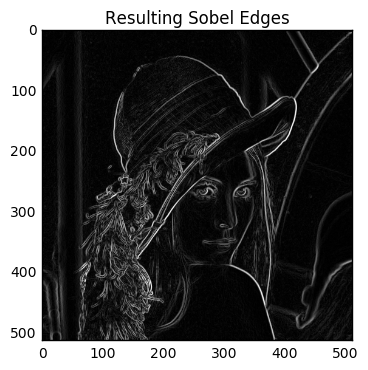

In [8]:
G_sobelX = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]])
G_sobelY = np.array([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])

G_x = ndimage.filters.convolve(grey, G_sobelX)
G_y = ndimage.filters.convolve(grey, G_sobelY)

G_result = np.zeros((G_x.shape[0], G_x.shape[1]))

for rownum in range(G_result.shape[0]):
   for colnum in range(G_result.shape[1]):
      G_result[rownum][colnum] = math.sqrt(G_x[rownum][colnum]**2 + G_y[rownum][colnum]**2)

plt.plot()
plt.subplot(111)
plt.imshow(G_result, cmap = matplotlib.cm.Greys_r)
plt.title('Resulting Sobel Edges')
plt.show()

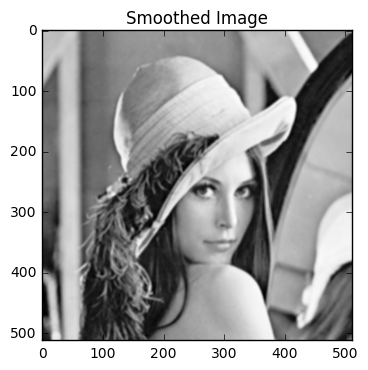

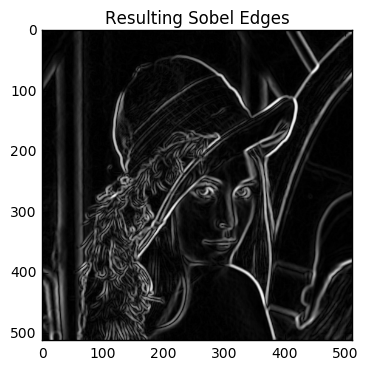

In [9]:
grey_smooth = ndimage.filters.convolve(grey, gaussFilter2D((5,5), 10))

G_x = ndimage.filters.convolve(grey_smooth, G_sobelX)
G_y = ndimage.filters.convolve(grey_smooth, G_sobelY)

G_result = np.zeros((G_x.shape[0], G_x.shape[1]))

for rownum in range(G_result.shape[0]):
   for colnum in range(G_result.shape[1]):
      G_result[rownum][colnum] = math.sqrt(G_x[rownum][colnum]**2 + G_y[rownum][colnum]**2)

plt.plot()
plt.subplot(111)
plt.imshow(grey_smooth, cmap = matplotlib.cm.Greys_r)
plt.title('Smoothed Image')
plt.show()
        
plt.plot()
plt.subplot(111)
plt.imshow(G_result, cmap = matplotlib.cm.Greys_r)
plt.title('Resulting Sobel Edges')
plt.show()

In [142]:
def gaussSpaceVariant(image, dimension, sigmas):
    image_stack = np.zeros((len(sigmas), image.shape[0], image.shape[1]))
    image_result = np.zeros(image.shape)
    weight_sum = np.zeros(image.shape)
   
    for i in range(len(sigmas)):
        gaussFilter = gaussFilter2D(dimension, sigmas[i])
        weight = weightMatrix(image.shape, 18*sigmas[i])
        weight_sum = weight_sum + weight
        image_stack[i] = ndimage.filters.convolve(image, gaussFilter)
        image_stack[i] = np.multiply(image_stack[i], weight)
        image_result += image_stack[i]
 
    plt.plot()
    plt.subplot(111)
    plt.imshow(weight_sum, cmap = matplotlib.cm.Greys_r)
    plt.title('Weight')
    plt.show()

    image_result = image_result/weight_sum
    return image_result

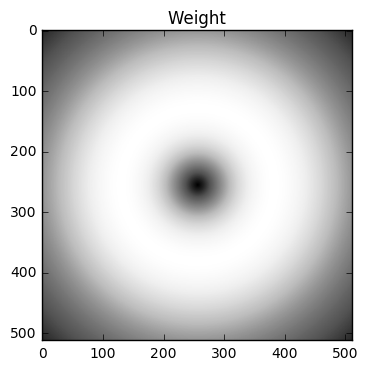

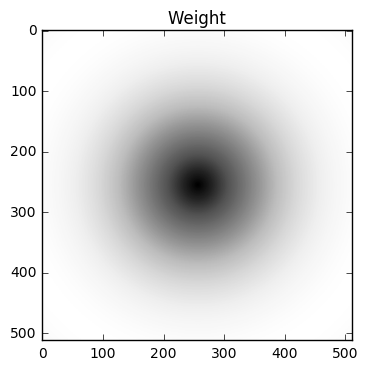

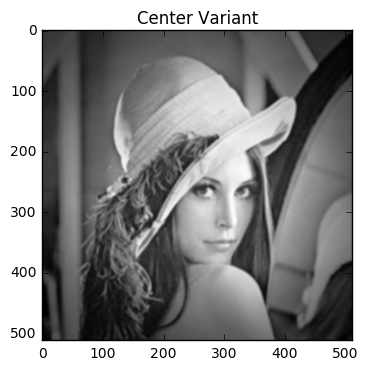

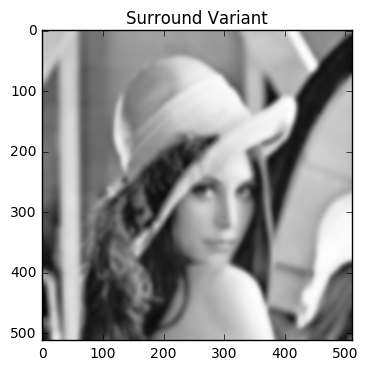

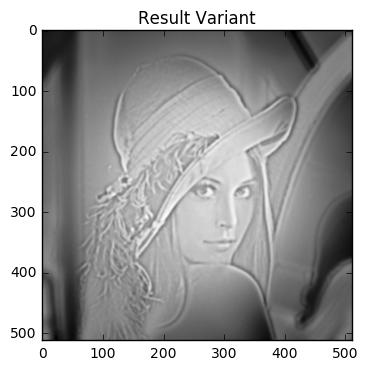

In [148]:
center_image = gaussSpaceVariant(grey, (5,5), [5.0, 10.0, 20.0, 30.0])
surround_image = gaussSpaceVariant(grey, (21,21), [15.0, 15.0, 60.0, 90.0])

result_image = center_image - surround_image/(center_image + surround_image + 1)

plt.plot()
plt.subplot(111)
plt.imshow(center_image, cmap = matplotlib.cm.Greys_r)
plt.title('Center Variant')
plt.show()

plt.plot()
plt.subplot(111)
plt.imshow(surround_image, cmap = matplotlib.cm.Greys_r)
plt.title('Surround Variant')
plt.show()

plt.plot()
plt.subplot(111)
plt.imshow(result_image, cmap = matplotlib.cm.Greys_r)
plt.title('Result Variant')
plt.show()